In [ ]:
2+3

5

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
x.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
x.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
x = pd.concat([x,geography,gender],axis=1)

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
x.drop(['Geography','Gender'],axis=1, inplace=True)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfe659fcc0>,
      dtype=object)

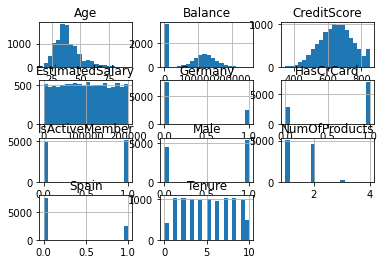

In [ ]:
x.hist(bins=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

(array([[6.100e+01, 4.780e+02, 1.310e+03, 2.184e+03, 2.207e+03, 1.276e+03,
         4.840e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.780e+02, 1.417e+03, 3.208e+03, 1.841e+03, 7.160e+02,
         3.970e+02, 1.600e+02, 7.100e+01, 1.200e+01],
        [0.000e+00, 3.250e+02, 1.708e+03, 2.407e+03, 1.602e+03, 1.564e+03,
         3.940e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 2.936e+03, 3.710e+02, 2.606e+03, 1.900e+03,
         1.860e+02, 1.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 4.039e+03, 0.000e+00, 0.000e+00, 3.704e+03,
         0.000e+00, 2.160e+02, 0.000e+00, 4.100e+01],
        [0.000e+00, 2.338e+03, 0.000e+00, 0.000e+00, 5.662e+03, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 3.873e+03, 0.000e+00, 0.000e+00, 4.127e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 4.780e+02, 1.742e+03, 1.841e+03, 1.797e+03, 1.792e+03,
         3.500e+02, 0.

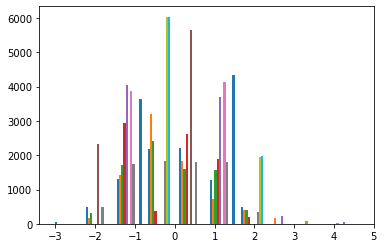

In [ ]:
plt.hist(x_train,bins=10)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Initializing the ANN

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu',input_dim=11))
classifier.add(Dropout(0.3))

In [ ]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

In [ ]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 547us/step - loss: 0.6776 - accuracy: 0.7266 - val_loss: 0.5173 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 3s 526us/step - loss: 0.5498 - accuracy: 0.7804 - val_loss: 0.4839 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 3s 523us/step - loss: 0.5073 - accuracy: 0.7944 - val_loss: 0.4659 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 3s 516us/step - loss: 0.4869 - accuracy: 0.7959 - val_loss: 0.4563 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 3s 521us/step - loss: 0.4730 - accuracy: 0.7962 - val_loss: 0.4468 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 3s 521us/step - loss: 0.4706 - accuracy: 0.8005 - val_loss: 0.4446 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 3s 521us/step

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
y_pred[0:20]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1572   23]
 [ 254  151]]


In [ ]:
score = accuracy_score(y_test,y_pred)
print(score)

0.8615
